Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

load restaurant dataset


In [2]:
df=pd.read_csv('restaurant_data.csv')
df.head()#Sharanya/Submission.xls

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


splitting data into test csv and train csv

In [4]:
# Split data into training and testing sets
train_df = df.head(8000)
test_df = df.tail(368)
# Save the training and testing sets to a single CSV file
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)


find basic info of dataset

In [5]:
df.shape

(8368, 17)

In [6]:
df.dtypes

Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

In [7]:
df.size

142256

In [8]:


# Define categorical columns
categorical_cols = ['Name', 'Location', 'Cuisine', 'Parking Availability']

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.dtypes)

Name                        int64
Location                    int64
Cuisine                     int64
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability        int64
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object


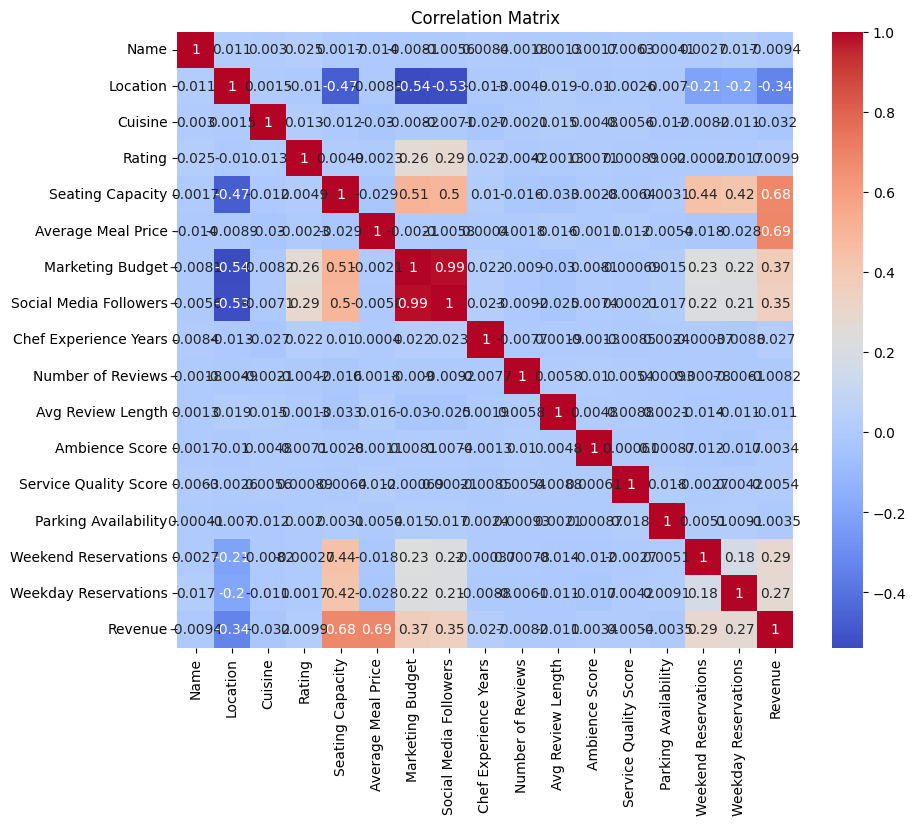

                            Name  Location   Cuisine    Rating  \
Name                    1.000000  0.011126  0.003003  0.024612   
Location                0.011126  1.000000  0.001474 -0.010497   
Cuisine                 0.003003  0.001474  1.000000  0.013447   
Rating                  0.024612 -0.010497  0.013447  1.000000   
Seating Capacity        0.001677 -0.474470 -0.011716  0.004862   
Average Meal Price     -0.014174 -0.008888 -0.029611 -0.002265   
Marketing Budget       -0.008101 -0.537566 -0.008160  0.263448   
Social Media Followers -0.005576 -0.526588 -0.007061  0.289559   
Chef Experience Years   0.008364 -0.013158 -0.027396  0.022192   
Number of Reviews      -0.001806 -0.004900 -0.002093 -0.004238   
Avg Review Length       0.001339  0.019437  0.015107 -0.001272   
Ambience Score          0.001654 -0.010258  0.004832  0.007099   
Service Quality Score   0.006325 -0.002602  0.005590  0.000887   
Parking Availability    0.000410 -0.007002 -0.012139  0.002018   
Weekend Re

In [9]:

# Select the desired columns
columns = ['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue']

# Calculate the correlation matrix
corr_matrix = df[columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print(corr_matrix)

In [10]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [11]:
# Drop the specified columns
df = df.drop(columns=['Name', 'Location', 'Cuisine', 'Rating', 
                        'Marketing Budget', 'Social Media Followers',
                        'Chef Experience Years', 'Number of Reviews', 
                        'Avg Review Length', 'Ambience Score', 
                        'Service Quality Score', 'Parking Availability',
                        'Weekend Reservations', 'Weekday Reservations'])

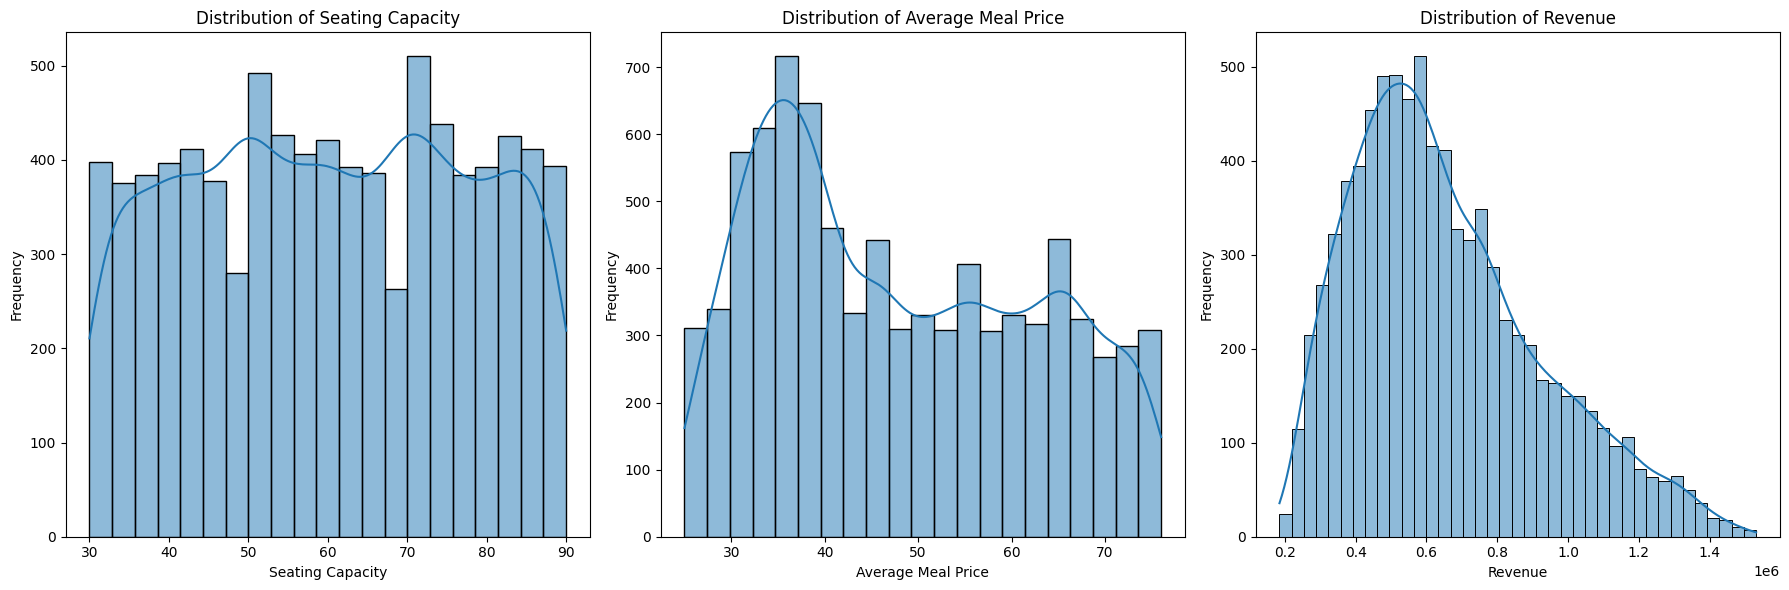

In [12]:
# Select the features of interest
features = ['Seating Capacity', 'Average Meal Price', 'Revenue']
# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
# Iterate over the features and subplots
for i, (feature, ax) in enumerate(zip(features, axes)):
    # Plot a histogram for the feature
    sns.histplot(df[feature], ax=ax, kde=True)
    
    # Set title and labels
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
# Layout so plots do not overlap
plt.tight_layout()
# Display the plot
plt.show()

In [13]:
df.columns

Index(['Seating Capacity', 'Average Meal Price', 'Revenue'], dtype='object')

In [14]:
df.dtypes

Seating Capacity        int64
Average Meal Price    float64
Revenue               float64
dtype: object

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the training data
train_df = pd.read_csv('train_data.csv')

# Select the features of interest
features = ['Seating Capacity', 'Average Meal Price']

# Define the features (X) and target (y)
X_train = train_df[features]
y_train = train_df['Revenue']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  random_state=42)

# Initialize and train a Random Forest Regressor model with hyperparameter tuning
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=5, 
                                     min_samples_leaf=2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50, random_state=42)

In [16]:
# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate the R-squared score on the validation set
r2_val = r2_score(y_val, y_pred_val)
print(f'R-squared score on validation set: {r2_val:.2f}')

# Make predictions on the training data
y_pred_train = rf_model.predict(X_train)

# Calculate the R-squared score on the training data
r2_train = r2_score(y_train, y_pred_train)
print(f'R-squared score on training data: {r2_train:.2f}')

R-squared score on validation set: 0.99
R-squared score on training data: 0.99


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the test data
test_df = pd.read_csv('test_data.csv')

# Select the features of interest
features = ['Seating Capacity', 'Average Meal Price']

# Define the features (X) and target (y)
X = test_df[features]
y = test_df['Revenue']

# Assuming rf_model is already trained
y_pred_test = rf_model.predict(X)



In [18]:
# Calculate the R-squared score on the test data
r2_test = r2_score(y, y_pred_test)
print(f'R-squared score on test data: {r2_test:.2f}')

# Create a new DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Revenue': y,
    'Predicted Revenue': y_pred_test
})

# Print the results

print("Actual vs Predicted Revenue:")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('revenue_predictions.csv', index=False)

R-squared score on test data: 0.99
Actual vs Predicted Revenue:
     Actual Revenue  Predicted Revenue
0         442292.21       4.264743e+05
1         296140.30       2.973155e+05
2        1105202.06       1.025760e+06
3         559600.12       5.567665e+05
4         844590.59       8.694505e+05
..              ...                ...
363       434653.45       4.328129e+05
364       414977.92       4.344123e+05
365       930395.87       8.770227e+05
366       311493.48       3.410490e+05
367       534142.98       5.209336e+05

[368 rows x 2 columns]


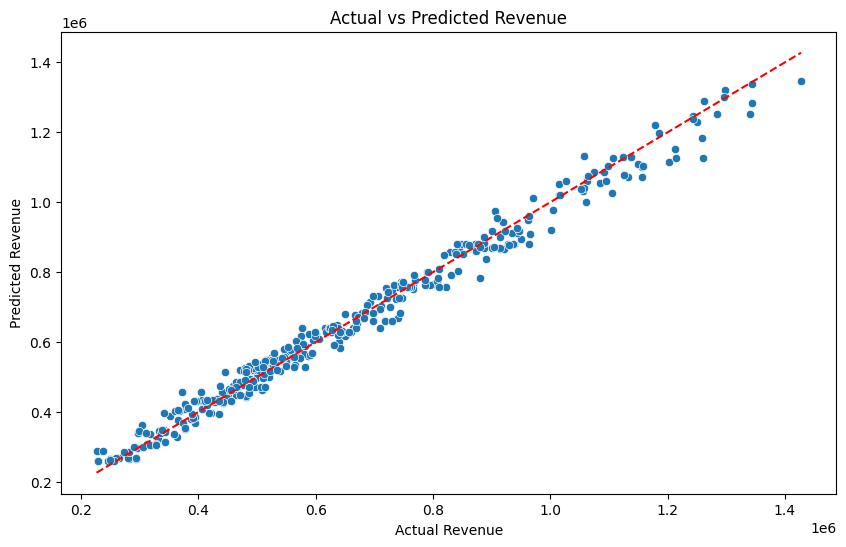

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Revenue': y,
    'Predicted Revenue': y_pred_test
})

# Scatter plot of actual vs predicted revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Revenue', y='Predicted Revenue', data=results_df)
plt.plot([results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()], 
         [results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()
